Question 2 :
KNN with Cross-Validation [Programming Question]:
You are given a dataset point KNN.csv. Each row corresponds to a 2D point with coordinates
(x1, x2) and a class label (0 or 1).
Your tasks are:
(a) Load the dataset from point KNN.csv, and split it into 80% training and 20% testing sets.
(b) Implement the K-Nearest Neighbors (KNN) algorithm for classification.
(c) Use 5-fold cross-validation on the training set to select the optimal number of neighbors k.
The aim is to avoid both high bias (underfitting) and high variance (overfitting).
(d) Report the following:
• The value of k selected by cross-validation.
• Training accuracy, validation accuracy, and test accuracy.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('points_KNN.csv')

# Split features (X) and labels (y)
X = df[['x1', 'x2']]
y = df['label']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset loaded and split successfully.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Dataset loaded and split successfully.
Training set shape: (240, 2), (240,)
Testing set shape: (60, 2), (60,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Implement the KNN classifier
# We'll choose a placeholder value for k for now, as we'll find the optimal k using cross-validation later.
knn = KNeighborsClassifier(n_neighbors=5)

print("KNN classifier implemented successfully.")

KNN classifier implemented successfully.


In [ ]:
# Train the KNN classifier
knn.fit(X_train, y_train)

print("KNN classifier trained successfully.")

KNN classifier trained successfully.


In [ ]:
# Create a dummy point as a DataFrame (matching the structure of X_train)
dummy_point = pd.DataFrame({'x1': [0.773922855], 'x2': [0.21001691]})

# Classify the dummy point
predicted_class = knn.predict(dummy_point)

print(f"The predicted class for the dummy point is: {predicted_class[0]}")

The predicted class for the dummy point is: 0


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of k values to test
k_values = range(1, 31) # Testing k from 1 to 30

# List to store mean cross-validation accuracies for each k
cv_scores = []

# Perform 5-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k (the one with the highest mean cross-validation accuracy)
optimal_k = k_values[np.argmax(cv_scores)]

print(f"Mean cross-validation accuracies for k values (1 to 30): {cv_scores}")
print(f"The optimal number of neighbors (k) found by 5-fold cross-validation is: {optimal_k}")

Mean cross-validation accuracies for k values (1 to 30): [np.float64(0.8541666666666667), np.float64(0.8708333333333333), np.float64(0.9), np.float64(0.8875), np.float64(0.9041666666666666), np.float64(0.9083333333333332), np.float64(0.9041666666666666), np.float64(0.8958333333333334), np.float64(0.8833333333333334), np.float64(0.8916666666666666), np.float64(0.875), np.float64(0.8916666666666666), np.float64(0.8875), np.float64(0.8791666666666667), np.float64(0.8791666666666667), np.float64(0.8833333333333334), np.float64(0.8833333333333332), np.float64(0.8875), np.float64(0.8875), np.float64(0.8833333333333334), np.float64(0.8833333333333332), np.float64(0.8916666666666666), np.float64(0.8916666666666666), np.float64(0.8916666666666666), np.float64(0.8875), np.float64(0.8958333333333333), np.float64(0.8916666666666666), np.float64(0.8916666666666666), np.float64(0.8875), np.float64(0.8875)]
The optimal number of neighbors (k) found by 5-fold cross-validation is: 6


In [ ]:
# Combine k values and their corresponding mean CV scores
k_cv_scores = list(zip(k_values, cv_scores))

# Sort the list by accuracy in descending order
k_cv_scores_sorted = sorted(k_cv_scores, key=lambda item: item[1], reverse=True)

# Print the top 5 k values with their accuracies
print("Top 5 k values with best cross-validation accuracies:")
for k, score in k_cv_scores_sorted[:5]:
    print(f"k={k}: {score:.4f}")

Top 5 k values with best cross-validation accuracies:
k=6: 0.9083
k=5: 0.9042
k=7: 0.9042
k=3: 0.9000
k=8: 0.8958


In [ ]:
from sklearn.metrics import accuracy_score

# 1. Train the final KNN model with the optimal k on the entire training set
final_knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn_model.fit(X_train, y_train)

# 2. Calculate training accuracy
y_train_pred = final_knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# 3. Report validation accuracy (the mean CV score for the optimal k)
# We already have the cv_scores list and optimal_k from the previous cell.
# The validation accuracy for the optimal k is the mean CV score at the index of optimal_k in k_values.
validation_accuracy = cv_scores[k_values.index(optimal_k)]


# 4. Calculate test accuracy
y_test_pred = final_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Optimal number of neighbors (k): {optimal_k}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy (mean CV score for optimal k): {validation_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Optimal number of neighbors (k): 6
Training Accuracy: 0.9083
Validation Accuracy (mean CV score for optimal k): 0.9083
Test Accuracy: 0.9167


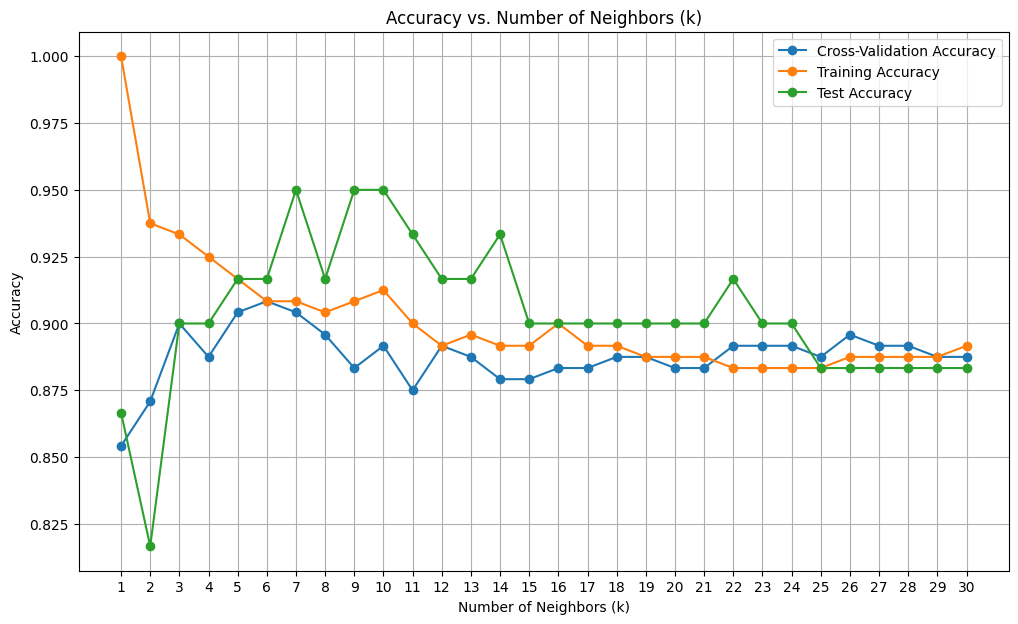

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Recalculate training and test accuracies for each k to plot them
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


# Plot the mean cross-validation accuracy, training accuracy, and test accuracy for each k
plt.figure(figsize=(12, 7))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', label='Cross-Validation Accuracy')
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', label='Test Accuracy')

plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

The training accuracy is pretty close to test accuracy which means , we have a balanced profile for the model. since the accuracy didn't drop during test,that means we are NOT dealing with overfitting. and since training accuracy isn't low, it kind of indicates, the model fits the training data well so not high bias.

Even though above graph may indicate test-accuracy is better for a different k than the one identified via CV fold , but we can't use this test data to determine a hyper-parameter like k in KNN since this may NOT generalize well(i.e. on a different test data set). so we stick to the k value identified via 5-fold CV